<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое занятие 2
# Компьютерный практикум по алгебре на Python

## Матрицы. Подстановки, действия над строками, столбцами и элементами. Формулы Крамера для решения СЛАУ.

https://docs.sympy.org/latest/tutorial/matrices.html

С помощью конструктора класса Matrix можно создавать матрицы, элементами которых служат не только числа или числовые выражения, но и символы Symbol, играющие роль математических переменных. Переменные могут принимать какие-то значения, эти значения можно подставлять в матрицы (и не только в них!) с помощью метода subs.

In [43]:
from sympy import Symbol, symbols, Matrix, simplify, factor, pi, latex, solve
from IPython.display import Latex

### Задание 1
Решить по формулам Крамера СЛАУ
\begin{align*}
\left\{\begin{matrix} 2 x_{1} +  x_{3}  = -8\\
- 4 x_{1} + 5 x_{2} - x_{4} = 20\\
- 6 x_{2} + x_{3} + 2 x_{4} = 2\\
2 x_{1} +   x_{2} - x_{3} - x_{4} = 4\\
\end{matrix}\right.
 \end{align*}
Проверить правильность найденного решения подстановкой (в математическом смысле! subs не нужно использовать).

Под проверкой правильности понимается проверка выполнения равенства $AX=b$ или $AX-b=\bar 0$.

In [38]:
A = Matrix([
    [2, 0, 1, 0],
    [-4, 5, 0, -1],
    [0, -6, 1, 2],
    [2, 1, -1, -1],
])

b = Matrix([
    -8,
    20,
    2,
    4,
])

X = Matrix([0 for _ in range(4)])

for i in range(4):
  A_ = A[ : , : ]
  A_[i] = b

  X[i] = A_.det() / A.det()

assert A*X == b

display(X)

Matrix([
[-13],
[-20],
[ 18],
[-68]])

### Задание 2
Решить по формулам Крамера СЛАУ с параметром
\begin{align*}
\left\{\begin{matrix} x_{1}  + ax_{4}  = 1\\
a x_{1} + x_{2} = 2\\
a x_{2} + x_{3} = 1\\
a x_{3} + x_{4} = 2\\
\end{matrix}\right.
 \end{align*}
Проверить правильность найденного решения подстановкой.

Составить матрицу $S$, столбцы которой являются решениями данной СЛАУ при $a = 0, 2, 3$.

**Указание.**

Оформить решение по формулам Крамера в виде функции.

Параметр $a$ описать как символ.

Использовать подстановки **subs** для построения матриц данной СЛАУ при $a = 0, 2, 3$ на основе матрицы с параметром.

Воспользоваться **simplify** для того, чтобы упростить выражение при проверке.

In [44]:
a = Symbol("a")

A = Matrix([
    [1, 0, 0, a],
    [a, 1, 0, 0],
    [0, a, 1, 0],
    [0, 0, a, 1],
])

b = Matrix([
    1,
    2,
    1,
    2,
])

X = Matrix([0 for _ in range(4)])

for i in range(4):
  A_ = A[ : , : ]
  A_[i] = b

  X[i] = A_.det() / A.det()

assert simplify(A*X) == b

display(simplify(X))
display(A.subs(a, 0), X.subs(a, 0))
display(A.subs(a, 2), X.subs(a, 2))
display(A.subs(a, 3), X.subs(a, 3))

Matrix([
[(2*a - 1)/(a**2 - 1)],
[  (a - 2)/(a**2 - 1)],
[(2*a - 1)/(a**2 - 1)],
[  (a - 2)/(a**2 - 1)]])

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

Matrix([
[1],
[2],
[1],
[2]])

Matrix([
[1, 0, 0, 2],
[2, 1, 0, 0],
[0, 2, 1, 0],
[0, 0, 2, 1]])

Matrix([
[1],
[0],
[1],
[0]])

Matrix([
[1, 0, 0, 3],
[3, 1, 0, 0],
[0, 3, 1, 0],
[0, 0, 3, 1]])

Matrix([
[5/8],
[1/8],
[5/8],
[1/8]])

### Задание 3.
Решить по формулам Крамера СЛАУ с параметрами
\begin{align*}
\left\{\begin{matrix} 2 x_{1} + a_{12} x_{2} + x_{3}  = b_1\\
x_{1} + a_{22} x_{2} - x_{3}   = b_2\\
x_{1} + 2 x_{2} + 3 x_{3}   = 1
\end{matrix}\right.
\end{align*}
Проверить правильность найденного решения подстановкой.

Найти такие наборы параметров, для которых полученное решение неприменимо (подсказка - из-за деления на ноль).

Показать, что для этих наборов определитель матрицы левой части равен нулю, использовать подстановки subs.

In [52]:
a1, a2, b1, b2 = symbols("a_1 a_2 b_1 b_2")

A = Matrix([
    [2, a1, 1],
    [1, a2, -1],
    [1, 2, 3],
])

b = Matrix([
    b1,
    b2,
    1,
])

X = Matrix([0 for _ in range(3)])

for i in range(3):
  A_ = A[ : , : ]
  A_[i] = b

  X[i] = A_.det() / A.det()

assert simplify(A*X) == b

display(simplify(X))

sol = solve(A.det(), [a1, a2])[0]
display(A.subs([(a1, sol[0]), (a2, sol[1])]).det())


Matrix([
[(-3*a_1*b_2 - a_1 + 3*a_2*b_1 - a_2 + 2*b_1 + 2*b_2)/(-4*a_1 + 5*a_2 + 6)],
[                                (-4*b_1 + 5*b_2 + 3)/(-4*a_1 + 5*a_2 + 6)],
[   (a_1*b_2 - a_1 - a_2*b_1 + 2*a_2 + 2*b_1 - 4*b_2)/(-4*a_1 + 5*a_2 + 6)]])

0

### Задание 4.
Дана матрица
\begin{align*}
M =
\left(\begin{matrix}
p & 1 & 0  & 0\\
1 & q & 0  & 0\\
0 & 0 & p & 1\\
0 & 0 & 1 & q
\end{matrix}\right)
\end{align*}
Вычислить и вывести на экран определитель этой матрицы.

Для целых четных $p$ от 2 до 8 **включительно** найти значения $q$, при которых определитель $M$ равен нулю, выводить на экран в цикле матрицу M, в которую подставлены значения $p$ и $q$. Использовать подстановки subs.

In [60]:
p, q = symbols("p q")

M = Matrix([
    [p, 1, 0, 0],
    [1, q, 0, 0],
    [0, 0, p, 1],
    [0, 0, 1, q],
])

d = simplify(M.det())

display(d)

for p_ in range(2, 9):
  q_ = solve(d.subs(p, p_))[0]
  display(M.subs([(p, p_), (q, q_)]))

(p*q - 1)**2

Matrix([
[2,   1, 0,   0],
[1, 1/2, 0,   0],
[0,   0, 2,   1],
[0,   0, 1, 1/2]])

Matrix([
[3,   1, 0,   0],
[1, 1/3, 0,   0],
[0,   0, 3,   1],
[0,   0, 1, 1/3]])

Matrix([
[4,   1, 0,   0],
[1, 1/4, 0,   0],
[0,   0, 4,   1],
[0,   0, 1, 1/4]])

Matrix([
[5,   1, 0,   0],
[1, 1/5, 0,   0],
[0,   0, 5,   1],
[0,   0, 1, 1/5]])

Matrix([
[6,   1, 0,   0],
[1, 1/6, 0,   0],
[0,   0, 6,   1],
[0,   0, 1, 1/6]])

Matrix([
[7,   1, 0,   0],
[1, 1/7, 0,   0],
[0,   0, 7,   1],
[0,   0, 1, 1/7]])

Matrix([
[8,   1, 0,   0],
[1, 1/8, 0,   0],
[0,   0, 8,   1],
[0,   0, 1, 1/8]])


### Задание 5*.
Матрица состоит из $n$  блоков
$
\left(\begin{matrix}
p & 1\\
1 & q
\end{matrix}\right)
$
\begin{align*}
M =
\left(\begin{matrix}
p & 1 & 0  & 0\\
1 & q & 0  & 0\\
0 & 0 & p & 1\\
0 & 0 & 1 & q
\end{matrix}\right)
\end{align*}
Вычислить и вывести на экран определитель этой матрицы.

Для целых четных $p$ от 2 до 8 **включительно** найти значения $q$, при которых определитель $M$ равен нулю, выводить на экран в цикле матрицу M, в которую подставлены значения $p$ и $q$. Использовать подстановки subs.

In [68]:
p, q, n = symbols("p q n")

M = Matrix([
    [p, 1, 0, 0],
    [1, q, 0, 0],
    [0, 0, p, 1],
    [0, 0, 1, q],
])

d = (p*q - 1)**n # (pq - 1)^n = 0 <=> (pq - 1) = 0 (n > 1)
display(d)

d = (p*q - 1)

for p_ in range(2, 9):
  q_ = simplify(solve(d.subs(p, p_), q)[0])
  display(M.subs([(p, p_), (q, q_)]))

(p*q - 1)**n

Matrix([
[2,   1, 0,   0],
[1, 1/2, 0,   0],
[0,   0, 2,   1],
[0,   0, 1, 1/2]])

Matrix([
[3,   1, 0,   0],
[1, 1/3, 0,   0],
[0,   0, 3,   1],
[0,   0, 1, 1/3]])

Matrix([
[4,   1, 0,   0],
[1, 1/4, 0,   0],
[0,   0, 4,   1],
[0,   0, 1, 1/4]])

Matrix([
[5,   1, 0,   0],
[1, 1/5, 0,   0],
[0,   0, 5,   1],
[0,   0, 1, 1/5]])

Matrix([
[6,   1, 0,   0],
[1, 1/6, 0,   0],
[0,   0, 6,   1],
[0,   0, 1, 1/6]])

Matrix([
[7,   1, 0,   0],
[1, 1/7, 0,   0],
[0,   0, 7,   1],
[0,   0, 1, 1/7]])

Matrix([
[8,   1, 0,   0],
[1, 1/8, 0,   0],
[0,   0, 8,   1],
[0,   0, 1, 1/8]])

### Индивидуальное задание.
1) В матрице $A$ выполнить заданную подстановку.

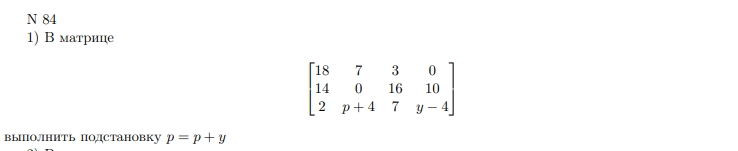

2) В матрице $B$
выполнить подстановки в форме списка,
а также выполнить подстановки в форме словаря.

Подстановки в форме словаря выполнить одновременно и не одновременно.

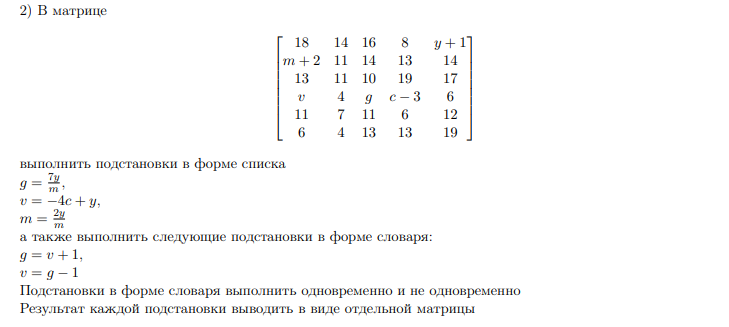

Результат каждой подстановки выводить в виде отдельной матрицы.

In [77]:
p, y = symbols("p y")

A = Matrix([
    [18, 7, 3, 0],
    [14, 0, 16, 10],
    [2, p+4, 7, y-4],
])

display(A.subs(p, p+y))


m, y, g, c, v = symbols("m y g c v")

B = Matrix([
    [18, 14, 16, 8, y + 1],
    [m + 2, 11, 14, 13, 14],
    [13, 11, 10, 19, 17],
    [v, 4, g, c - 3, 6],
    [11, 7, 11, 6, 12],
    [6, 4, 13, 13, 19]
])

display(B.subs([(g, 7*y / m), (v, -4*c + y), (m, 2*y / m)]))
display(B.subs({g: v + 1, v: g - 1}, simultaneous=True))
display(B.subs({g: v + 1, v: g - 1}))

Matrix([
[18,         7,  3,     0],
[14,         0, 16,    10],
[ 2, p + y + 4,  7, y - 4]])

Matrix([
[       18, 14,    16,     8, y + 1],
[2 + 2*y/m, 11,    14,    13,    14],
[       13, 11,    10,    19,    17],
[ -4*c + y,  4, 7*m/2, c - 3,     6],
[       11,  7,    11,     6,    12],
[        6,  4,    13,    13,    19]])

Matrix([
[   18, 14,    16,     8, y + 1],
[m + 2, 11,    14,    13,    14],
[   13, 11,    10,    19,    17],
[g - 1,  4, v + 1, c - 3,     6],
[   11,  7,    11,     6,    12],
[    6,  4,    13,    13,    19]])

Matrix([
[   18, 14, 16,     8, y + 1],
[m + 2, 11, 14,    13,    14],
[   13, 11, 10,    19,    17],
[g - 1,  4,  g, c - 3,     6],
[   11,  7, 11,     6,    12],
[    6,  4, 13,    13,    19]])